In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


W celu nauki pracy z danymi postanowiłem opracować dane prywantego konta netflixowego. Poniżej możemy zobaczyć przykład danych.

In [92]:
#popracować nad przerobieniem tych danych z objectów na lepsze formaty
df = pd.read_csv('ViewingActivity.csv')
df.head(20)


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Pixar,2024-06-23 20:42:54,00:01:05,Autoplayed: user action: None;,New Amsterdam: Season 1_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone,00:01:05,00:01:05,PL (Poland)
1,Pixar,2024-06-23 20:38:12,00:00:15,Autoplayed: user action: None;,The Equalizer 2_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone,00:00:16,00:00:16,PL (Poland)
2,Pixar,2024-06-23 20:09:14,00:01:18,Autoplayed: user action: None;,The Equalizer - CLM 4,HOOK,Apple iPhone 15 Pro iPhone,00:00:06,00:00:06,PL (Poland)
3,Pixar,2024-06-13 18:07:10,01:56:14,NaN,Bez litości 2,NaN,Google Chromecast V5 Streaming Stick,01:56:14,01:56:14,PL (Poland)
4,Pixar,2024-06-13 18:05:31,00:00:46,Autoplayed: user action: None;,The Equalizer 2_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone,00:00:46,Not latest view,PL (Poland)
5,Pixar,2024-06-13 18:05:02,00:00:28,Autoplayed: user action: None;,The Equalizer - CLM 4,HOOK,Apple iPhone 15 Pro iPhone,00:00:28,Not latest view,PL (Poland)
6,Pixar,2024-06-13 18:01:45,00:00:45,Autoplayed: user action: None;,Sezon 2 (Klip): Krawiec,HOOK,Apple iPhone 15 Pro iPhone,00:00:45,00:00:45,PL (Poland)
7,Pixar,2024-06-13 17:56:39,00:01:05,Autoplayed: user action: None;,New Amsterdam: Season 1_hook_primary_16x9,HOOK,Apple iPhone 15 Pro iPhone,00:01:05,Not latest view,PL (Poland)
8,Pixar,2024-05-31 16:24:00,00:00:07,Autoplayed: user action: None;,Sezon 2 (Klip): Krawiec,HOOK,Apple iPhone 15 Pro iPhone,00:00:07,Not latest view,PL (Poland)
9,Pixar,2024-05-31 16:22:24,00:00:47,Autoplayed: user action: None;,Sezon 2 (Klip): Krawiec,HOOK,Apple iPhone 15 Pro iPhone,00:00:47,Not latest view,PL (Poland)


Chciałem zobaczyć podstawowy parametr, ile czasu spędziłem/zmarnowałem na oglądaniu netflixa. W tym celu utworzyłem nowey DF ,który wykorzystamu do sumowania. Dodatkowo zmieniłem typ kolumny z czasem oglądania.

In [3]:
user_duration = df[['Profile Name','Duration']]
user_duration['Duration'] = pd.to_timedelta(user_duration['Duration'])
user_duration.head()

C:\Users\stala\AppData\Local\Temp\ipykernel_134592\482256813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_duration['Duration'] = pd.to_timedelta(user_duration['Duration'])


,Profile Name,Duration
0,Pixar,0 days 00:01:05
1,Pixar,0 days 00:00:15
2,Pixar,0 days 00:01:18
3,Pixar,0 days 01:56:14
4,Pixar,0 days 00:00:46


In [4]:
user_duration['Duration'].sum()

Timedelta('251 days 21:24:31')

In [ ]:
Zsumowałem dla każdego użytkownika czas spędzony 'Duration'. Anomalią godzinową okazało się konto ziomeczki ,które spedziło aż 155 dni na Netflixie.

In [82]:
summed = user_duration.groupby('Profile Name')['Duration'].sum()
summed = summed.reset_index()
summed['Duration'] = summed['Duration'].dt.total_seconds() / 3600
summed['Duration'] = summed['Duration']/24
summed.head()

,Profile Name,Duration
0,Pixar,4.023611
1,Rodzice,3.431725
2,Wiktoria,61.296377
3,Wojtuś,27.185544
4,Ziomeczki :),155.954769


Prosty wykres kolumnowy dla ukazania różnicy w danych

<Axes: title={'center': 'Hours of watching Netflix'}, xlabel='Profile Name', ylabel='Sum spent time (days)'>

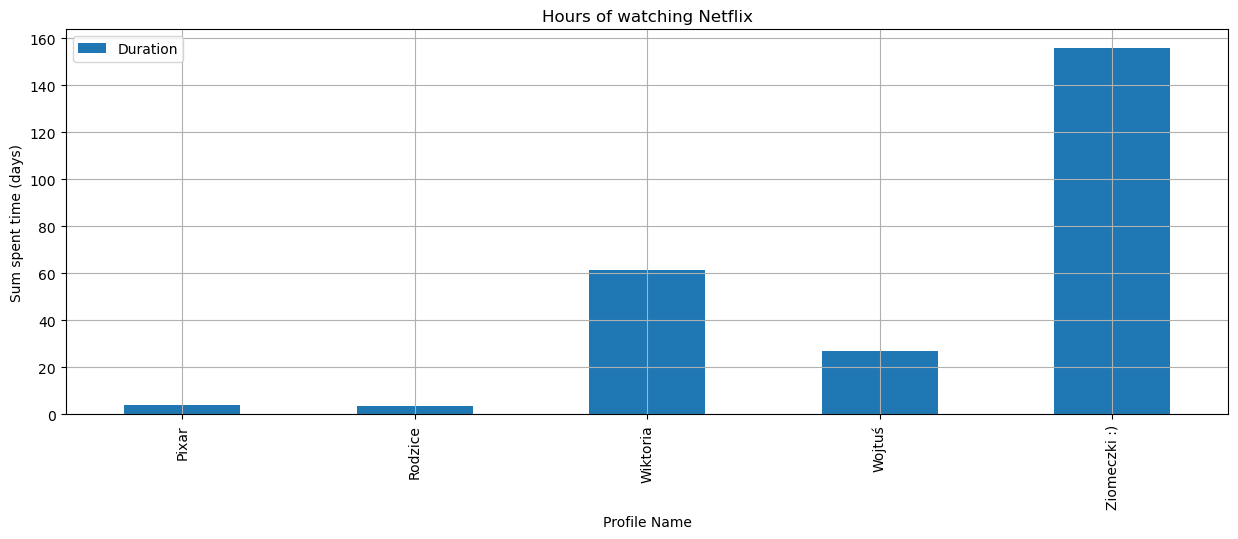

In [90]:
summed.plot(kind='bar' ,x = 'Profile Name' , y = 'Duration', title = 'Hours of watching Netflix', legend=True,
            figsize = (15,5) , grid = True, ylabel = "Sum spent time (days)")






Następnie chciałęm zobaczyć urzędzenia wykorzystywane przez konto z najwiekszą liczbą godzin.

In [116]:
filtered_df = df[df['Profile Name'] == 'Ziomeczki :)']
filtered_df.head()
filtered_df['Device Type'].unique()

#filtered_df.groupby('Device Type')['Start Time'].max()
#filtered_df['Start Time'].max()
#filtered_df['Start Time'].min()

array(['TCL TV 2018 UHD Android TV Smart TV',
       'Apple iPad Pro 12.9 inch 3rd Gen Wi-Fi iPad',
       'DefaultWidevineAndroidPhone',
       'LG DTV 2022 LG O22 UHD TV Smart TV',
       'Samsung 2015 Hawk-M Smart TV',
       'Apple iPad Pro 11 inch 1st Gen Wi-Fi iPad'], dtype=object)

In [118]:
filtered_df.head()
#filtered_df.groupby('Device Type')['Start Time'].sum()
#filtered_df['Duration'] = pd.to_timedelta(filtered_df['Duration'])
#filtered_

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
6256,Ziomeczki :),2024-02-17 14:42:25,00:04:33,Autoplayed: user action: User_Interaction;,Drapieżniki: Sezon 1: Niedźwiedź polarny (Odci...,NaN,TCL TV 2018 UHD Android TV Smart TV,00:04:37,00:04:37,PL (Poland)
6257,Ziomeczki :),2024-02-17 13:59:09,00:43:11,NaN,Drapieżniki: Sezon 1: Puma (Odcinek 3),NaN,TCL TV 2018 UHD Android TV Smart TV,00:43:51,00:43:51,PL (Poland)
6258,Ziomeczki :),2024-02-17 13:58:51,00:00:06,Autoplayed: user action: None;,Sezon 1 (Klip nr 2): Drapieżniki,HOOK,TCL TV 2018 UHD Android TV Smart TV,00:00:06,00:00:06,PL (Poland)
6259,Ziomeczki :),2024-02-17 13:58:37,00:00:04,Autoplayed: user action: None;,Sezon 5 (Klip): Smoczy Książę,HOOK,TCL TV 2018 UHD Android TV Smart TV,00:00:04,00:00:04,PL (Poland)
6260,Ziomeczki :),2024-02-17 13:58:13,00:00:08,Autoplayed: user action: None;,Czarne lustro: Sezon 6 (teaser nr 1),TEASER_TRAILER,TCL TV 2018 UHD Android TV Smart TV,00:00:08,00:00:08,PL (Poland)


In [150]:
duration_ziomeczki = filtered_df.loc[:,('Duration','Device Type')]
duration_ziomeczki = duration_ziomeczki.reset_index(drop = True)
duration_ziomeczki['Duration'] = pd.to_timedelta(duration_ziomeczki['Duration'])

duration_ziomeczki.head()

#filtered_df['Duration'] = pd.to_timedelta(filtered_df['Duration'])


,Duration,Device Type
0,0 days 00:04:33,TCL TV 2018 UHD Android TV Smart TV
1,0 days 00:43:11,TCL TV 2018 UHD Android TV Smart TV
2,0 days 00:00:06,TCL TV 2018 UHD Android TV Smart TV
3,0 days 00:00:04,TCL TV 2018 UHD Android TV Smart TV
4,0 days 00:00:08,TCL TV 2018 UHD Android TV Smart TV


Dokonałem podobnej obródki danych aby zobaczyć na jakim urządzenie spędzono najwięcej godzin

<Axes: title={'center': 'Devices'}, xlabel='Device Type'>

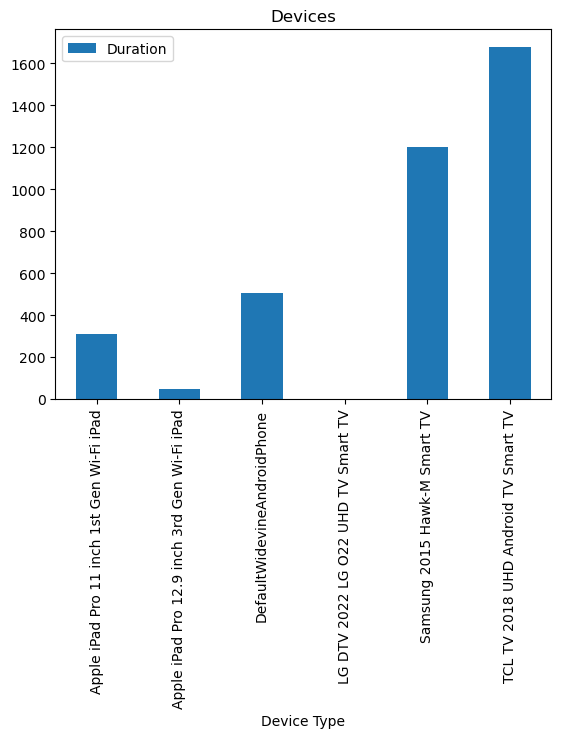

In [174]:
#z tego funkcje bym zrobił
summed_ziomeczki = duration_ziomeczki.groupby('Device Type')['Duration'].sum()
summed_ziomeczki = summed_ziomeczki.reset_index()
summed_ziomeczki['Duration'] = summed_ziomeczki['Duration'].dt.total_seconds() / 3600
summed_ziomeczki.head()
summed_ziomeczki.plot(kind = 'bar', x = 'Device Type', y = 'Duration', title = 'Devices')

#duration_ziomeczki.plot(kind='bar' ,x = 'Device Type' , y = 'Duration', title = 'Hours of watching Netflix', legend=True,
            #figsize = (15,5) , grid = True, ylabel = "Sum spent time (days)")





#rodzice_df = df[df['Profile Name'] == 'Rodzice']
#rodzice_df.head()

Następnie chciałem zbadać ile czasu dziennie użytkownik Ziomeczki spędzał na Netflixie

In [228]:
LastDate = pd.to_datetime(filtered_df['Start Time'].max())
StartDate = pd.to_datetime(filtered_df['Start Time'].min())
PeriodOfWatching = (LastDate - StartDate)
PeriodOfWatching = PeriodOfWatching.days
PeriodOfWatching
PeriodOfWatching / 365
#PeriodOfWatching = PeriodOfWatching / 365
#print(PeriodOfWatching)

3.9643835616438357

Wynik przedstawiony jest w godzinach. Niestety nie do końca jest on rzetelny. Z faktu znajomości danych wiem ,że konto ziomeczki przestało być aktywnie wykorzystywane w maju 2023, a maksymalny termin czyli ostatni termin użytkowania był z lutego 2024. Co zaburza wynik. Uważam ,że do przedstawienia rzetelneijszych danych powiniem odseparowac dane już po braku aktywnosci

In [226]:
TotalHours = summed_ziomeczki.sum()
TotalHours[1]
PerDay = PeriodOfWatching / TotalHours[1]
PerDay

C:\Users\stala\AppData\Local\Temp\ipykernel_134592\4229485060.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TotalHours[1]
C:\Users\stala\AppData\Local\Temp\ipykernel_134592\4229485060.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  PerDay = PeriodOfWatching / TotalHours[1]


0.3865971347936531

In [256]:
filtered_df = filtered_df.reset_index(drop = True)
filtered_df.head()
#filtered_df['Start Time'] = pd.to_timedelta(filtered_df['Start Time'])
#filtered_df.dtypes
#filtered_df[Year] = filtered_df['Start Time'].dt.year 

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ziomeczki :),2024-02-17 14:42:25,00:04:33,Autoplayed: user action: User_Interaction;,Drapieżniki: Sezon 1: Niedźwiedź polarny (Odci...,NaN,TCL TV 2018 UHD Android TV Smart TV,00:04:37,00:04:37,PL (Poland)
1,Ziomeczki :),2024-02-17 13:59:09,00:43:11,NaN,Drapieżniki: Sezon 1: Puma (Odcinek 3),NaN,TCL TV 2018 UHD Android TV Smart TV,00:43:51,00:43:51,PL (Poland)
2,Ziomeczki :),2024-02-17 13:58:51,00:00:06,Autoplayed: user action: None;,Sezon 1 (Klip nr 2): Drapieżniki,HOOK,TCL TV 2018 UHD Android TV Smart TV,00:00:06,00:00:06,PL (Poland)
3,Ziomeczki :),2024-02-17 13:58:37,00:00:04,Autoplayed: user action: None;,Sezon 5 (Klip): Smoczy Książę,HOOK,TCL TV 2018 UHD Android TV Smart TV,00:00:04,00:00:04,PL (Poland)
4,Ziomeczki :),2024-02-17 13:58:13,00:00:08,Autoplayed: user action: None;,Czarne lustro: Sezon 6 (teaser nr 1),TEASER_TRAILER,TCL TV 2018 UHD Android TV Smart TV,00:00:08,00:00:08,PL (Poland)


In [10]:
wiktoria_df = df[df['Profile Name'] == 'Wiktoria']
wiktoria_df['Start Time'].max()
wiktoria_df['Start Time'].min()

'2019-10-25 17:15:20'

In [11]:
filtered_df['Start Time'] = pd.to_datetime(df['Start Time'])
filtered_df['date'] = filtered_df['Start Time'].dt.date
filtered_df['hours'] = filtered_df['Start Time'].dt.time
filtered_df.head()

C:\Users\stala\AppData\Local\Temp\ipykernel_134592\594937654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start Time'] = pd.to_datetime(df['Start Time'])
C:\Users\stala\AppData\Local\Temp\ipykernel_134592\594937654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['Start Time'].dt.date
C:\Users\stala\AppData\Local\Temp\ipykernel_134592\594937654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,date,hours
6256,Ziomeczki :),2024-02-17 14:42:25,0 days 00:04:33,Autoplayed: user action: User_Interaction;,Drapieżniki: Sezon 1: Niedźwiedź polarny (Odci...,NaN,TCL TV 2018 UHD Android TV Smart TV,00:04:37,00:04:37,PL (Poland),2024-02-17,14:42:25
6257,Ziomeczki :),2024-02-17 13:59:09,0 days 00:43:11,NaN,Drapieżniki: Sezon 1: Puma (Odcinek 3),NaN,TCL TV 2018 UHD Android TV Smart TV,00:43:51,00:43:51,PL (Poland),2024-02-17,13:59:09
6258,Ziomeczki :),2024-02-17 13:58:51,0 days 00:00:06,Autoplayed: user action: None;,Sezon 1 (Klip nr 2): Drapieżniki,HOOK,TCL TV 2018 UHD Android TV Smart TV,00:00:06,00:00:06,PL (Poland),2024-02-17,13:58:51
6259,Ziomeczki :),2024-02-17 13:58:37,0 days 00:00:04,Autoplayed: user action: None;,Sezon 5 (Klip): Smoczy Książę,HOOK,TCL TV 2018 UHD Android TV Smart TV,00:00:04,00:00:04,PL (Poland),2024-02-17,13:58:37
6260,Ziomeczki :),2024-02-17 13:58:13,0 days 00:00:08,Autoplayed: user action: None;,Czarne lustro: Sezon 6 (teaser nr 1),TEASER_TRAILER,TCL TV 2018 UHD Android TV Smart TV,00:00:08,00:00:08,PL (Poland),2024-02-17,13:58:13


In [12]:
plot = filtered_df[['Duration','date']]
#plot.drop('index')
plot_summed = plot.groupby('date')['Duration'].sum().reset_indeX()
#filtered_df.groupby('Device Type')['Start Time'].max()
#plot_summed.head()

#plt.plot('date','Duration')

AttributeError: 'Series' object has no attribute 'reset_indeX'

In [ ]:
plot_summed['date'] = plot_summed['date'].dt.strftime('%Y-%m-%d')

#plt.bar(plot_summed['Duration'],plot_summed['date'])